# МЕТОДИ ВИДОБУВАННЯ АСОЦІАТИВНИХ ПРАВИЛ З ВЕЛИКИХ МАСИВІВ ДАНИХ

1. Ознайомитися з конспектом лекцій та рекомендованою літературою за темою роботи, а також з додатком А, що містить опис програмного забезпечення для видобування асоціативних правил з великих масивів даних.
2. Сформувати набір даних для обробки та аналізу.
3. Розробити за допомогою середовища Matlab програмне забезпечення для видобування асоціативних правил з великих масивів даних або вивчити рекомендоване програмне забезпечення (пакет Armada модулю Matlab) та здійснити обробку набору даних з метою виділення асоціативних
правил.

In [1]:
#  install package
import pip 
pip.main(['install','apyori'])
import apyori

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [2]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
from apyori import apriori# one of ALR method 
import os 

In [3]:
# для аналииза выберем датасет  https://www.biz.uiowa.edu/faculty/jledolter/DataMining/lastfm.csv
df = pd.read_csv('https://www.biz.uiowa.edu/faculty/jledolter/DataMining/lastfm.csv')

In [4]:
df

,user,artist,sex,country
0,1,red hot chili peppers,f,Germany
1,1,the black dahlia murder,f,Germany
2,1,goldfrapp,f,Germany
3,1,dropkick murphys,f,Germany
4,1,le tigre,f,Germany
...,...,...,...,...
289950,19718,bob dylan,f,Canada
289951,19718,pixies,f,Canada
289952,19718,the clash,f,Canada
289953,19718,a tribe called quest,f,Canada


в датасете содержиться информация о прослушанных треках \
1. ARL лежат в основе рекомендательных систем \
(мы сможем рекомендовать пользователю другие музыкальные группы) 

In [160]:
df.info()
# user - айди юзера 
# artist - артист/группа которую слушают 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289955 entries, 0 to 289954
Data columns (total 4 columns):
user       289955 non-null int64
artist     289955 non-null object
sex        289955 non-null object
country    289955 non-null object
dtypes: int64(1), object(3)
memory usage: 8.8+ MB


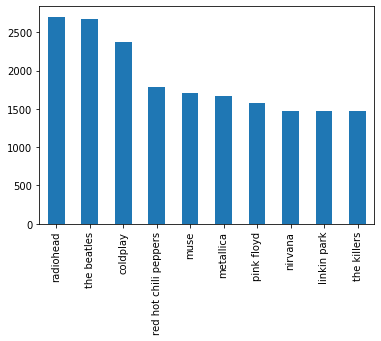

In [161]:
# топ 10 артистов 
df['artist'].value_counts().nlargest(10).plot.bar()

In [162]:
X = df[['user','artist']].drop_duplicates()

In [163]:
# Method 1: Apriori 
# prepare dataset 

X.head()

,user,artist
0,1,red hot chili peppers
1,1,the black dahlia murder
2,1,goldfrapp
3,1,dropkick murphys
4,1,le tigre


In [164]:
df_x=pd.DataFrame()
for art in X.groupby('user').artist.apply(list):
    df_x = df_x.append(pd.DataFrame(art).transpose())

In [165]:
df_x.insert(0,'user_id',res.index)

In [166]:
df_x.reset_index(drop=True, inplace = True)

In [169]:
df_x = df_x.fillna(method = 'ffill' ,axis=1) #inplace = True)
# df_x.head()

In [183]:
df_x
df_x.drop(['user_id'], inplace = True, axis =1 ) 
#  to list 
records = df_x.values.tolist()
records

[['red hot chili peppers',
  'the black dahlia murder',
  'goldfrapp',
  'dropkick murphys',
  'le tigre',
  'schandmaul',
  'edguy',
  'jack johnson',
  'eluveitie',
  'the killers',
  'judas priest',
  'rob zombie',
  'john mayer',
  'the who',
  'guano apes',
  'the rolling stones',
  'the rolling stones',
  'the rolling stones',
  'the rolling stones',
  'the rolling stones',
  'the rolling stones',
  'the rolling stones',
  'the rolling stones',
  'the rolling stones',
  'the rolling stones',
  'the rolling stones',
  'the rolling stones',
  'the rolling stones',
  'the rolling stones',
  'the rolling stones',
  'the rolling stones',
  'the rolling stones',
  'the rolling stones',
  'the rolling stones',
  'the rolling stones',
  'the rolling stones',
  'the rolling stones',
  'the rolling stones',
  'the rolling stones',
  'the rolling stones',
  'the rolling stones',
  'the rolling stones',
  'the rolling stones',
  'the rolling stones',
  'the rolling stones',
  'the rolling st

In [6]:
records = []
for i in df['user'].unique():
    records.append(list(df[df['user'] == i]['artist'].values))


In [191]:
association_rules = apriori(records, min_suppor=0.01, min_confidence=0.4, min_lift=3, min_lenght = 2)
result = list(association_rules)

In [192]:
len(result)

0

In [193]:
records

[['red hot chili peppers',
  'the black dahlia murder',
  'goldfrapp',
  'dropkick murphys',
  'le tigre',
  'schandmaul',
  'edguy',
  'jack johnson',
  'eluveitie',
  'the killers',
  'judas priest',
  'rob zombie',
  'john mayer',
  'the who',
  'guano apes',
  'the rolling stones'],
 ['devendra banhart',
  'boards of canada',
  'cocorosie',
  'aphex twin',
  'animal collective',
  'atmosphere',
  'joanna newsom',
  'air',
  'portishead',
  'massive attack',
  'broken social scene',
  'arcade fire',
  'plaid',
  'prefuse 73',
  'm83',
  'the flashbulb',
  'pavement',
  'goldfrapp',
  'amon tobin',
  'sage francis',
  'four tet',
  'max richter',
  'autechre',
  'radiohead',
  'neutral milk hotel',
  'beastie boys',
  'aesop rock',
  'mf doom',
  'the books'],
 ['tv on the radio',
  'tool',
  'kyuss',
  'dj shadow',
  'air',
  'a tribe called quest',
  'the cinematic orchestra',
  'beck',
  'bon iver',
  'röyksopp',
  'bonobo',
  'the decemberists',
  'snow patrol',
  'battles',
  't

In [194]:
df_x

,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,75
0,red hot chili peppers,the black dahlia murder,goldfrapp,dropkick murphys,le tigre,schandmaul,edguy,jack johnson,eluveitie,the killers,...,the rolling stones,the rolling stones,the rolling stones,the rolling stones,the rolling stones,the rolling stones,the rolling stones,the rolling stones,the rolling stones,the rolling stones
1,devendra banhart,boards of canada,cocorosie,aphex twin,animal collective,atmosphere,joanna newsom,air,portishead,massive attack,...,the books,the books,the books,the books,the books,the books,the books,the books,the books,the books
2,tv on the radio,tool,kyuss,dj shadow,air,a tribe called quest,the cinematic orchestra,beck,bon iver,röyksopp,...,led zeppelin,led zeppelin,led zeppelin,led zeppelin,led zeppelin,led zeppelin,led zeppelin,led zeppelin,led zeppelin,led zeppelin
3,dream theater,ac/dc,metallica,iron maiden,bob marley & the wailers,megadeth,children of bodom,trivium,nightwish,sublime,...,volbeat,volbeat,volbeat,volbeat,volbeat,volbeat,volbeat,volbeat,volbeat,volbeat
4,lily allen,kanye west,sigur rós,pink floyd,stevie wonder,metallica,thievery corporation,iron maiden,the streets,muse,...,queen,queen,queen,queen,queen,queen,queen,queen,queen,queen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,armin van buuren,above & beyond,atb,ferry corsten,paul van dyk,madonna,chicane,linkin park,avril lavigne,the prodigy,...,tiësto,tiësto,tiësto,tiësto,tiësto,tiësto,tiësto,tiësto,tiësto,tiësto
14996,misfits,type o negative,arch enemy,red hot chili peppers,satyricon,burzum,cannibal corpse,led zeppelin,slipknot,children of bodom,...,deftones,deftones,deftones,deftones,deftones,deftones,deftones,deftones,deftones,deftones
14997,abba,james blunt,jason mraz,amy winehouse,queen,philip glass,wolfgang amadeus mozart,adele,u2,pink,...,madonna,madonna,madonna,madonna,madonna,madonna,madonna,madonna,madonna,madonna
14998,marilyn manson,beyoncé,madonna,t.a.t.u.,katy perry,hilary duff,miley cyrus,kylie minogue,paramore,spice girls,...,moby,moby,moby,moby,moby,moby,moby,moby,moby,moby


In [196]:
#создаим из них матрицу
transactions = []
for i in range(0, 7501): 
    transactions.append([str(df_x.values[i,j]) for j in range(0, 20)])

In [209]:
# в зависимости от min_support min_confidence min_lift min_length - разное кол-во 
result = list(
    apriori(transactions, min_support = 0.003, min_confidence = 0.2, min_lift = 4, min_length = 2))

In [210]:
len(result)

1391

In [211]:
result

[RelationRecord(items=frozenset({'2pac', 'dr. dre'}), support=0.0034662045060658577, ordered_statistics=[OrderedStatistic(items_base=frozenset({'dr. dre'}), items_add=frozenset({'2pac'}), confidence=0.28888888888888886, lift=15.70257648953301)]),
 RelationRecord(items=frozenset({'eminem', '2pac'}), support=0.005332622317024397, ordered_statistics=[OrderedStatistic(items_base=frozenset({'2pac'}), items_add=frozenset({'eminem'}), confidence=0.2898550724637681, lift=8.266931173196673)]),
 RelationRecord(items=frozenset({'jay-z', '2pac'}), support=0.0037328356219170776, ordered_statistics=[OrderedStatistic(items_base=frozenset({'2pac'}), items_add=frozenset({'jay-z'}), confidence=0.20289855072463767, lift=8.45523349436393)]),
 RelationRecord(items=frozenset({'2pac', 'kanye west'}), support=0.004266097853619517, ordered_statistics=[OrderedStatistic(items_base=frozenset({'2pac'}), items_add=frozenset({'kanye west'}), confidence=0.23188405797101447, lift=4.403448908457163)]),
 RelationRecord(

In [208]:
df_x

,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,75
0,red hot chili peppers,the black dahlia murder,goldfrapp,dropkick murphys,le tigre,schandmaul,edguy,jack johnson,eluveitie,the killers,...,the rolling stones,the rolling stones,the rolling stones,the rolling stones,the rolling stones,the rolling stones,the rolling stones,the rolling stones,the rolling stones,the rolling stones
1,devendra banhart,boards of canada,cocorosie,aphex twin,animal collective,atmosphere,joanna newsom,air,portishead,massive attack,...,the books,the books,the books,the books,the books,the books,the books,the books,the books,the books
2,tv on the radio,tool,kyuss,dj shadow,air,a tribe called quest,the cinematic orchestra,beck,bon iver,röyksopp,...,led zeppelin,led zeppelin,led zeppelin,led zeppelin,led zeppelin,led zeppelin,led zeppelin,led zeppelin,led zeppelin,led zeppelin
3,dream theater,ac/dc,metallica,iron maiden,bob marley & the wailers,megadeth,children of bodom,trivium,nightwish,sublime,...,volbeat,volbeat,volbeat,volbeat,volbeat,volbeat,volbeat,volbeat,volbeat,volbeat
4,lily allen,kanye west,sigur rós,pink floyd,stevie wonder,metallica,thievery corporation,iron maiden,the streets,muse,...,queen,queen,queen,queen,queen,queen,queen,queen,queen,queen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,armin van buuren,above & beyond,atb,ferry corsten,paul van dyk,madonna,chicane,linkin park,avril lavigne,the prodigy,...,tiësto,tiësto,tiësto,tiësto,tiësto,tiësto,tiësto,tiësto,tiësto,tiësto
14996,misfits,type o negative,arch enemy,red hot chili peppers,satyricon,burzum,cannibal corpse,led zeppelin,slipknot,children of bodom,...,deftones,deftones,deftones,deftones,deftones,deftones,deftones,deftones,deftones,deftones
14997,abba,james blunt,jason mraz,amy winehouse,queen,philip glass,wolfgang amadeus mozart,adele,u2,pink,...,madonna,madonna,madonna,madonna,madonna,madonna,madonna,madonna,madonna,madonna
14998,marilyn manson,beyoncé,madonna,t.a.t.u.,katy perry,hilary duff,miley cyrus,kylie minogue,paramore,spice girls,...,moby,moby,moby,moby,moby,moby,moby,moby,moby,moby


In [212]:
print(type(records))


<class 'list'>


In [213]:
association_rules = apriori(records, min_support=0.01, min_confidence=0.4, min_lift=3, min_length=2)
association_results = list(association_rules)


In [214]:
print("There are {} Relation derived.".format(len(association_results)))


There are 91 Relation derived.


In [215]:
len(association_results)

91

In [216]:
for i in range(0, len(association_results)):
    print(association_results[i][0])

frozenset({'tool', 'a perfect circle'})
frozenset({'kaiser chiefs', 'arctic monkeys'})
frozenset({'rihanna', 'beyoncé'})
frozenset({'black sabbath', 'metallica'})
frozenset({'blink-182', 'sum 41'})
frozenset({'linkin park', 'breaking benjamin'})
frozenset({'bright eyes', 'death cab for cutie'})
frozenset({'broken social scene', 'death cab for cutie'})
frozenset({'radiohead', 'broken social scene'})
frozenset({'in flames', 'children of bodom'})
frozenset({'coldplay', 'keane'})
frozenset({'snow patrol', 'coldplay'})
frozenset({'the fray', 'coldplay'})
frozenset({'travis', 'coldplay'})
frozenset({'justice', 'daft punk'})
frozenset({'the decemberists', 'death cab for cutie'})
frozenset({'the postal service', 'death cab for cutie'})
frozenset({'the shins', 'death cab for cutie'})
frozenset({'deep purple', 'led zeppelin'})
frozenset({'dream theater', 'metallica'})
frozenset({'fall out boy', 'panic at the disco'})
frozenset({'kaiser chiefs', 'franz ferdinand'})
frozenset({'linkin park', 'good

In [217]:
for item in association_results:
    # first index of the inner list
    # Contains base item and add item
    pair = item[0]
    items = [x for x in pair]
    print("Rule: With " + items[0] + " you can also listen " + items[1])

    # second index of the inner list
    print("Support: " + str(item[1]))

    # third index of the list located at 0th
    # of the third index of the inner list

    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("=====================================")

Rule: With tool you can also listen a perfect circle
Support: 0.016266666666666665
Confidence: 0.44283121597096187
Lift: 8.717149920688225
Rule: With kaiser chiefs you can also listen arctic monkeys
Support: 0.012533333333333334
Confidence: 0.4008528784648188
Lift: 5.3116547499755145
Rule: With rihanna you can also listen beyoncé
Support: 0.013933333333333334
Confidence: 0.46860986547085204
Lift: 10.88103402796096
Rule: With black sabbath you can also listen metallica
Support: 0.0172
Confidence: 0.45263157894736844
Lift: 4.06555310431768
Rule: With blink-182 you can also listen sum 41
Support: 0.014133333333333333
Confidence: 0.42741935483870963
Lift: 7.420474910394264
Rule: With linkin park you can also listen breaking benjamin
Support: 0.0108
Confidence: 0.4426229508196721
Lift: 4.507362024640246
Rule: With bright eyes you can also listen death cab for cutie
Support: 0.0152
Confidence: 0.4021164021164021
Lift: 4.944054124381993
Rule: With broken social scene you can also listen death

In [218]:
# алгоритм 2 FP-Growth Python 
#  install package
import pip 
pip.main(['install','pyfpgrowth'])

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


  Created wheel for pyfpgrowth: filename=pyfpgrowth-1.0-py2.py3-none-any.whl size=5479 sha256=c0341f1ded54d7fb122e03349e0651b1214a0b4ed8f8f6fda2a2a7d3afda56b6
  Stored in directory: /Users/ekaterinakarpo/Library/Caches/pip/wheels/73/97/4b/f12ac994f6bbb99597396255435824c73ad3916be1e678be55
Successfully built pyfpgrowth


You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


0

In [5]:
import pyfpgrowth

In [ ]:
#Сгенериуем паттерны
patterns = pyfpgrowth.find_frequent_patterns(records, 2)
#Выучим правила
rules = pyfpgrowth.generate_association_rules(patterns, 30);
#Покажем
rules